In [ ]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

**Learn the Basics** \|\| [Quickstart](quickstart_tutorial.html) \|\|
[Tensors](tensorqs_tutorial.html) \|\| [Datasets &
DataLoaders](data_tutorial.html) \|\|
[Transforms](transforms_tutorial.html) \|\| [Build
Model](buildmodel_tutorial.html) \|\|
[Autograd](autogradqs_tutorial.html) \|\|
[Optimization](optimization_tutorial.html) \|\| [Save & Load
Model](saveloadrun_tutorial.html)

Learn the Basics
================

Authors: [Suraj Subramanian](https://github.com/subramen), [Seth
Juarez](https://github.com/sethjuarez/), [Cassie
Breviu](https://github.com/cassiebreviu/), [Dmitry
Soshnikov](https://soshnikov.com/), [Ari
Bornstein](https://github.com/aribornstein/)

Most machine learning workflows involve working with data, creating
models, optimizing model parameters, and saving the trained models. This
tutorial introduces you to a complete ML workflow implemented in
PyTorch, with links to learn more about each of these concepts.

We\'ll use the FashionMNIST dataset to train a neural network that
predicts if an input image belongs to one of the following classes:
T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker,
Bag, or Ankle boot.

[This tutorial assumes a basic familiarity with Python and Deep Learning
concepts.]{.title-ref}

Running the Tutorial Code
-------------------------

You can run this tutorial in a couple of ways:

-   **In the cloud**: This is the easiest way to get started! Each
    section has a \"Run in Microsoft Learn\" and \"Run in Google Colab\"
    link at the top, which opens an integrated notebook in Microsoft
    Learn or Google Colab, respectively, with the code in a fully-hosted
    environment.
-   **Locally**: This option requires you to setup PyTorch and
    TorchVision first on your local machine ([installation
    instructions](https://pytorch.org/get-started/locally/)). Download
    the notebook or copy the code into your favorite IDE.

How to Use this Guide
---------------------

If you\'re familiar with other deep learning frameworks, check out the
[0. Quickstart](quickstart_tutorial.html) first to quickly familiarize
yourself with PyTorch\'s API.

If you\'re new to deep learning frameworks, head right into the first
section of our step-by-step guide: [1. Tensors](tensor_tutorial.html).

::: {.toctree maxdepth="2" hidden=""}
quickstart\_tutorial tensorqs\_tutorial data\_tutorial
transforms\_tutorial buildmodel\_tutorial autogradqs\_tutorial
optimization\_tutorial saveloadrun\_tutorial
:::


In [6]:
import torch
import numpy as np

data = [[2,3], [1,4]]
x_data = torch.tensor(data)

np_array = np.array(data)
y_data = torch.from_numpy(np_array)

print(y_data)

x_ones = torch.ones_like(x_data) # 生成一个全是1 的矩阵，数据类型等于x_data
print(x_ones)

y_rand = torch.rand_like(x_data, dtype=torch.float) # 生成一个随机矩阵
print(y_rand)

tensor([[2, 3],
        [1, 4]])
tensor([[1, 1],
        [1, 1]])
tensor([[0.0836, 0.2958],
        [0.0870, 0.3185]])


In [10]:
shape = (2,3,)
rand_tensor = torch.rand(shape) # 生成一个随机矩阵
ones_tensor = torch.ones(shape, dtype=torch.int) # 生成一个全是1 的矩阵，默认数据类型是float32。除非指定是torch.int
zeros_tensor = torch.zeros(shape, dtype=torch.int) # 生成一个全是0的矩阵
print(rand_tensor)
print(ones_tensor)
print(zeros_tensor)

tensor([[0.6869, 0.8472, 0.6251],
        [0.1319, 0.2213, 0.7619]])
tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)
tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)


In [18]:
tensor_rand = torch.rand((3,4))
print(tensor_rand.shape)
print(tensor_rand.dtype)
print(tensor_rand.device)
# Check if CUDA (GPU) is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Move your tensors to the device
tensor_rand = tensor_rand.to(device)
print(tensor_rand.device)

# if torch.accelerator.is_available():
#   tensor_rand = tensor_rand.to(torch.accelerator.current_accelerator())

torch.Size([3, 4])
torch.float32
cpu
cpu


In [39]:
tensor = torch.ones((4,4))
print(tensor[0]) # first row
print(tensor[1])
print(tensor[:, 0]) # first column
print(tensor[..., -1]) # last column

tensor[:,1] = 0
print(tensor)

tensor = torch.cat([tensor, tensor, tensor], dim = 1)
print(tensor)

print("-----")

# tensor = torch.cat([tensor, tensor, tensor], dim = 0)
# print(tensor)

print("------")

### y1, y2, y3 should have the same value
y1 = tensor @ tensor.T
print(y1)
y2 = tensor.matmul(tensor.T)
print(y2)
y3 = torch.rand((4,4))
torch.matmul(tensor, tensor.T, out=y3)
print(y3)

tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])
tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])
-----
------
tensor([[9., 9., 9., 9.],
        [9., 9., 9., 9.],
        [9., 9., 9., 9.],
        [9., 9., 9., 9.]])
tensor([[9., 9., 9., 9.],
        [9., 9., 9., 9.],
        [9., 9., 9., 9.],
        [9., 9., 9., 9.]])
tensor([[9., 9., 9., 9.],
        [9., 9., 9., 9.],
        [9., 9., 9., 9.],
        [9., 9., 9., 9.]])


In [32]:
a = torch.tensor([[1, 2],
                 [3, 4]])
print(a @ a)
print(a * a)

tensor([[ 7, 10],
        [15, 22]])
tensor([[ 1,  4],
        [ 9, 16]])


In [42]:
tensor = torch.tensor([[1,2],[2,3],[3,4],[4,5]])
agg = tensor.sum() # sum all elements
print(agg)

agg_colum = tensor.sum(dim=0) # dim = 0 means colum wise
print(agg_colum)

agg_row = tensor.sum(dim=1) # dim = 1 means row wise
print(agg_row)

tensor_add_5 = tensor.add(5)
print(tensor_add_5)
print(tensor)
tensor.add_(5)
print(tensor)

tensor(24)
tensor([10, 14])
tensor([3, 5, 7, 9])
tensor([[ 6,  7],
        [ 7,  8],
        [ 8,  9],
        [ 9, 10]])
tensor([[1, 2],
        [2, 3],
        [3, 4],
        [4, 5]])
tensor([[ 6,  7],
        [ 7,  8],
        [ 8,  9],
        [ 9, 10]])


# DataSets and DataLoads

In [45]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 22.6MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 348kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 6.23MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 7.37MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



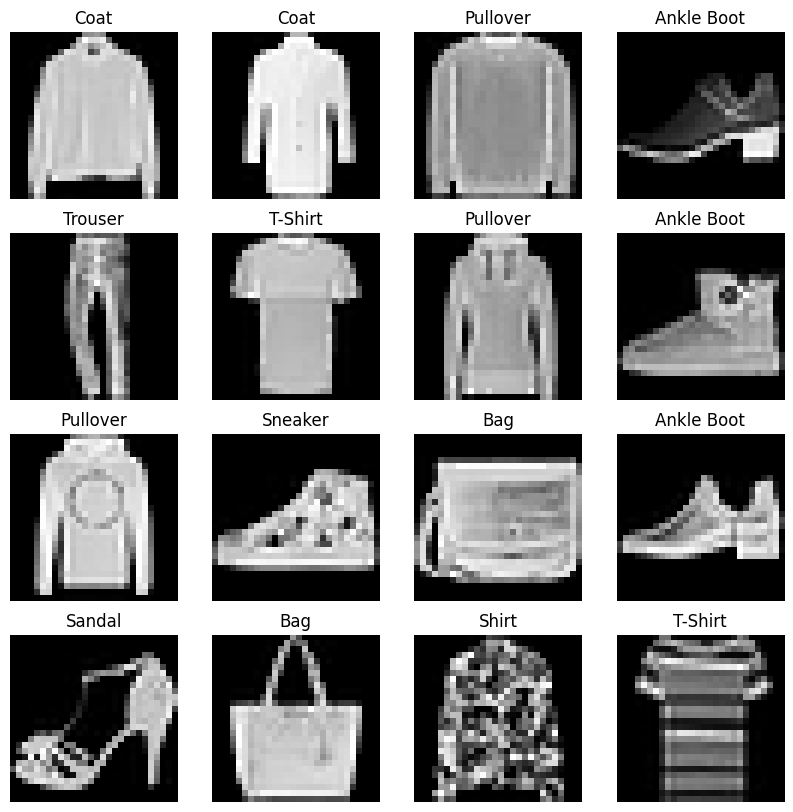

In [48]:
# This code creates a 3x3 grid of random images from the FashionMNIST training dataset.
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(10, 10))  # Create 10*10 inch figure
cols, rows = 4, 4  # Define grid size
for i in range(1, cols * rows + 1):
    # Get random index from dataset
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    # Get image and label at that index
    img, label = training_data[sample_idx]
    # Add subplot to grid
    figure.add_subplot(rows, cols, i)
    # Set title as clothing item name
    plt.title(labels_map[label])
    # Remove axes
    plt.axis("off")
    # Display image in grayscale
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()